This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [ ]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE'
#MESH = 'TRI03-MEDIUM'
#MESH = 'TRI03-INTERMEDIATE'
#MESH = 'TRI03-FINE'
#MESH = 'TRI03-SUPERFINE'
#MESH = 'TRI03-MEGAFINE'
#MESH = 'TRI03-ULTRAFINE'

#MESH = 'QUA04-COARSE'
#MESH = 'QUA04-MEDIUM'
#MESH = 'QUA04-INTERMEDIATE'
#MESH = 'QUA04-FINE'
#MESH = 'QUA04-SUPERFINE'
#MESH = 'QUA04-MEGAFINE'
#MESH = 'QUA04-ULTRAFINE'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-COARSE'
#MESH = 'TRI06-MEDIUM'
#MESH = 'TRI06-INTERMEDIATE'
MESH = 'TRI06-FINE'
#MESH = 'TRI06-SUPERFINE'
#MESH = 'TRI06-MEGAFINE'
#MESH = 'TRI06-ULTRAFINE'

#MESH = 'QUA09-COARSE'
#MESH = 'QUA09-MEDIUM'
#MESH = 'QUA09-INTERMEDIATE'
#MESH = 'QUA09-FINE'
#MESH = 'QUA09-SUPERFINE'
#MESH = 'QUA09-MEGAFINE'
#MESH = 'QUA09-ULTRAFINE'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-COARSE'
#MESH = 'TRI10-MEDIUM'
#MESH = 'TRI10-INTERMEDIATE'
#MESH = 'TRI10-FINE'
#MESH = 'TRI10-SUPERFINE'

In [2]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Equilibrium = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [3]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = True
Equilibrium.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [4]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.QuadratureOrder2D = 8   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Equilibrium.ext_maxiter = 10           # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Equilibrium.alpha = 1.0             # AIKITEN'S METHOD RELAXATION PARAMETER
Equilibrium.R0_axis = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 0.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = 3.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [8]:
# DEFINE INITIAL PLASMA BOUNDARY

# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY


"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = np.array([5.5, -2.3]),       # ACTIVE SADDLE POINT        
                                           Xright = np.array([7.2, 0.6]),         # POINT ON RIGHT
                                           Xleft = np.array([4.8, 1.0]),          # POINT ON LEFT
                                           Xtop = np.array([5.9, 2.8]))           # POINT ON TOP
"""

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

"\ndef PHI0(X):\n    return\nProblem.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,\n                                           GEOMETRY = 'OTHER',\n                                           PHI0 = PHI0)\n"

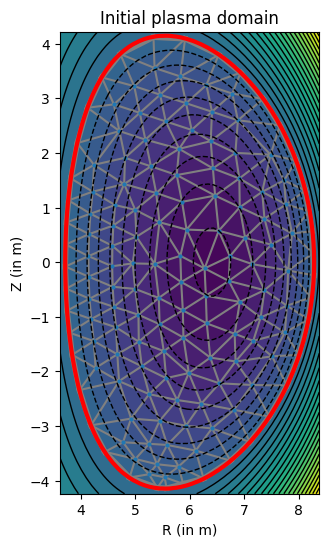

In [9]:
Equilibrium.initialPHI.Plot()

In [10]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX

Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.38,       # INVERSE ASPECT RATIO
                                  kappa = 1.8,          # ELONGATION
                                  delta = 0.34,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE


"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""    

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

"\ndef PSI0(X):\n    return\nProblem.initialPSI = InitialGuess(PROBLEM = Equilibrium,\n                                  PSI_GUESS = 'OTHER',\n                                  PSI0 = PSI0)\n"

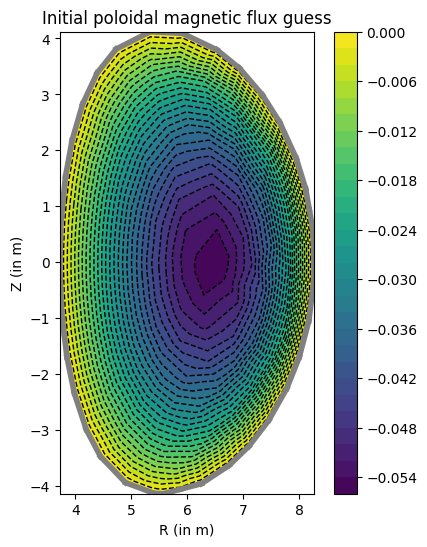

In [11]:
Equilibrium.initialPSI.Plot()

In [12]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY


"""
# ZHENG MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""

"""
# JARDIN MODEL
# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0)
"""

"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

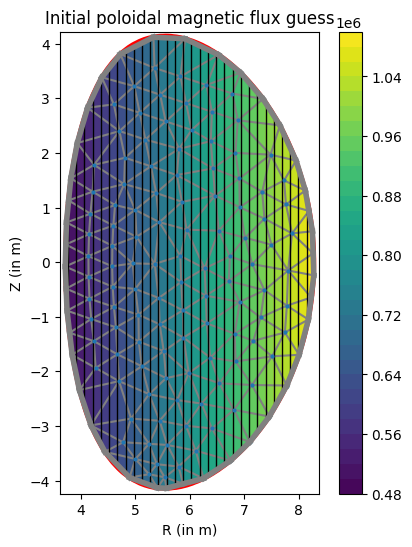

In [13]:
Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.11323587448268674 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.5053721433961758 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·1.9787398515475183
Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/GradShafranovSolver.py:2900: UserWarning: No contour levels were found within the data range.
  contour1 = ax.tricontour(self.X[:,0],self.X[:,1], field, levels=[0], colors = 'black')
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/GradShafranovSolver.py:2901: UserWarning: No contour levels were found within the data range.
  contour2 = ax.tricontour(self.X[:,0],self.X[:,1], self.PlasmaLS, levels=[0], colors = 'red')


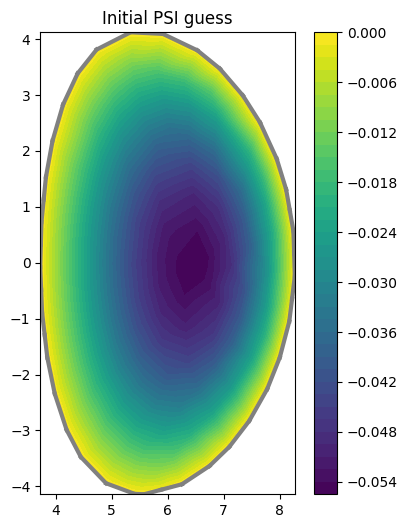

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/GradShafranovSolver.py:2901: UserWarning: No contour levels were found within the data range.
  contour2 = ax.tricontour(self.X[:,0],self.X[:,1], self.PlasmaLS, levels=[0], colors = 'red')


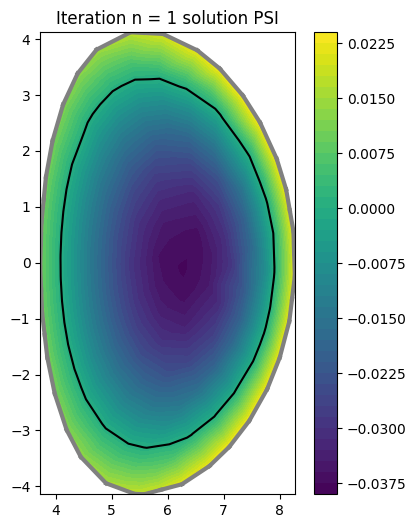

COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
SOLUTION CONVERGED


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/GradShafranovSolver.py:2901: UserWarning: No contour levels were found within the data range.
  contour2 = ax.tricontour(self.X[:,0],self.X[:,1], self.PlasmaLS, levels=[0], colors = 'red')


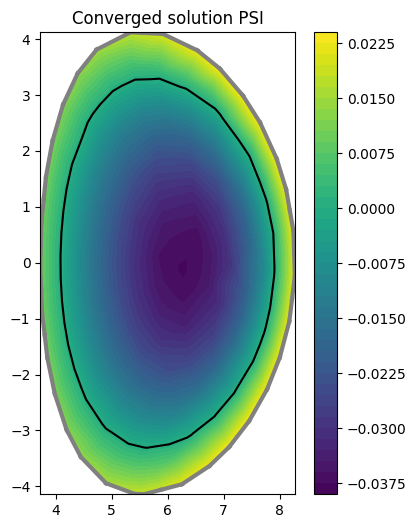

In [14]:
## NAME SIMULATION CASE 
CASE = "TS-FIXED-LINEAR-FEM"
## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)